<a href="https://colab.research.google.com/github/swastikbanerjee/AML_Lab/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Program 3a

Importing Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Importing datasets

In [ ]:
dfa = pd.read_csv("/content/Program_3a_Dataset.csv")
dfb = pd.read_csv("/content/Program_3b_dataset.csv")

In [ ]:
dfa.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
dfa.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
dfa.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

No missing values. Hence our dataframe is clean.

Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x = dfa[['duration','age','campaign']]
y = dfa['y']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Fitting Logistic Regression model to our training dataframe

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_train, y_train)

LogisticRegression(random_state=42)

Accuracy Score on training data

In [ ]:
from sklearn.metrics import accuracy_score
x_train_prediction = log_reg.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)
training_data_accuracy*100

89.27543269397523

Accuracy Score on test data

In [ ]:
x_test_prediction = log_reg.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
test_data_accuracy*100

89.49583232176094

In [ ]:
y_pred = log_reg.predict(x_test)

Classification Report (Precision, Recall, F1-Score, Accuracy) of the model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.91      0.98      0.94     10969
         yes       0.61      0.18      0.28      1388

    accuracy                           0.89     12357
   macro avg       0.76      0.58      0.61     12357
weighted avg       0.87      0.89      0.87     12357



Confusion Matrix of the model

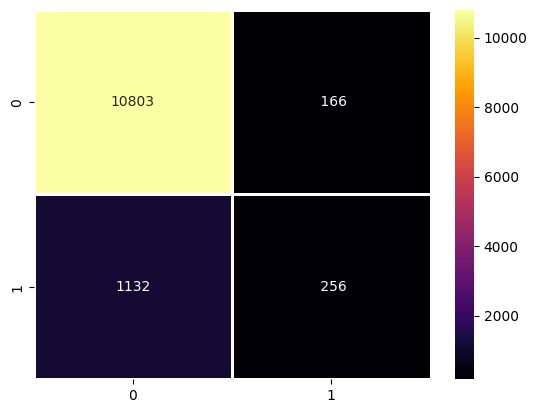

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,linewidths=2,cmap='inferno',fmt='4')
plt.show()

Inference : For the combination of predictors we have used - Duration, Age and Campaign, we got a 89% accuracy score to predict whether the client will subscribe to a term deposit or not (both for training and test dataset). The evaluation metric scores for positive case came really poor. We need more data or upsampling for positive cases is required, for improving classification scores for this model.

Program 3b

In [ ]:
dfb.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
dfb.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [ ]:
dfb.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

No missing values. Hence our dataframe is clean.

Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x = dfb[['variance','skewness','curtosis','entropy']]
y = dfb['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Fitting Logistic Regression model to our training dataframe

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=44)
log_reg.fit(x_train, y_train)

LogisticRegression(random_state=44)

Accuracy Score on training data

In [ ]:
from sklearn.metrics import accuracy_score
x_train_prediction = log_reg.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)
training_data_accuracy*100

99.16666666666667

Accuracy Score on test data

In [ ]:
x_test_prediction = log_reg.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
test_data_accuracy*100

98.7864077669903

In [ ]:
y_pred = log_reg.predict(x_test)

Classification Report (Precision, Recall, F1-Score, Accuracy) of the model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       229
           1       0.98      0.99      0.99       183

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



Confusion Matrix of the model

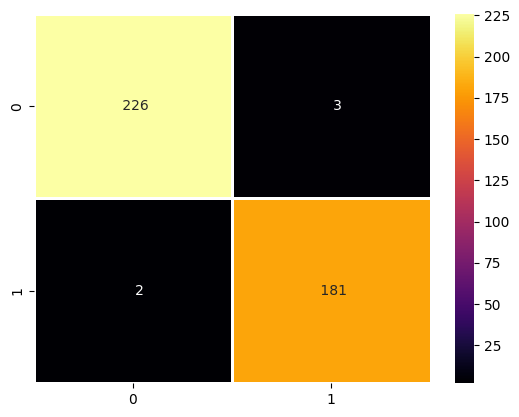

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,linewidths=2,cmap='inferno',fmt='4')
plt.show()

Inference : For the combination of predictors we have used - variance, skewness, curtosis, entropy we got a 99% accuracy score to predict whether the client will subscribe to a term deposit or not (both for training and test dataset). Evaluation metric scores for both positive and negative scores case came really good. The classes were properly balanced, model performed well on test data, very less False Positive and False Positive Values were seen in the Confusion Matrix.